In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/Spain/energy-spain.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code== 'ESP']


pop_table = pd.read_csv('../BDD/population.csv')
pop_table = pop_table[pop_table.Code=='ESP']

spain_table = pd.merge(gdp_table, pop_table, on=['Year'])
spain_table = pd.merge(spain_table, energy_table, on=['Year'])

year = spain_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)
pop = spain_table['Total population (Gapminder, HYDE & UN)']
energy = spain_table['Energy (PetaJoules)']
gdpc = spain_table['GDP per capita']
gdp = gdpc*pop

Text(0, 0.5, 'Energy (PetaJoules)')

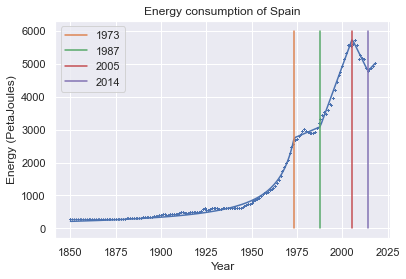

In [46]:
plt.scatter(year, energy, s=0.05)
r, y0 = reg.expReg(year, energy)
# plt.plot(yplot, reg.exp_fun(yplot, r=r, y0= y0))
#plt.plot(yplot, reg.hypllll(yplot, 2.99*10000, 1986, -10, 145, -140,75, 1976, 1986, 2006, 2014))

b,c,d,f,h,k,x1,x2, x3, x4 = reg.hypLLLL(year, energy, p0=(2.99*10000, 1986, -10, 145, -140,75, 1976, 1986, 2006, 2014))
plt.plot(yplot, reg.hypllll(yplot,b,c,d,f,h,k,x1,x2, x3, x4 ))
plt.plot([x1,x1],[0,6000], label=str(int(x1)))
plt.plot([x2,x2],[0,6000], label=str(int(x2)))
plt.plot([x3,x3],[0,6000], label=str(int(x3)))
plt.plot([x4,x4],[0,6000], label=str(int(x4)))
plt.legend()
plt.title('Energy consumption of Spain')
plt.xlabel('Year')
plt.ylabel('Energy (PetaJoules)')

Text(0, 0.5, '10e12 $')

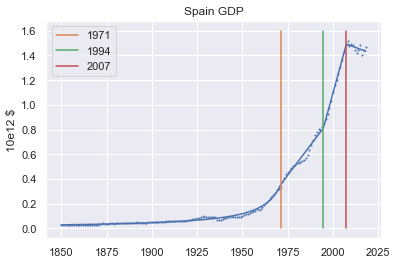

In [108]:
plt.scatter(year, gdp/10**12, s=1)
b,c,d,f,h,k,x1,x2, x3, x4 = 4.5,1986 , 0.01, 0.036, -0.01, 15, 1977, 1985, 2009, 2100
# plt.plot(yplot, reg.hypllll(yplot, b,c,d,f,h,k,x1,x2, x3, x4))
b,c,d,f,h,k,x1,x2, x3, x4 = reg.hypLLLL(year, gdp/10**12, p0 =(b,c,d,f,h,k,x1,x2, x3, x4), bounds=[-2, 2100] )
plt.plot(yplot, reg.hypllll(yplot, b,c,d,f,h,k,x1,x2, x3, x4))
plt.plot([x1,x1],[0,1.6], label=str(int(x1)))
plt.plot([x2,x2],[0,1.6], label=str(int(x2)))
plt.plot([x3,x3],[0,1.6], label=str(int(x3)))
plt.legend()
plt.title('Spain GDP')
plt.ylabel('10e12 $')

(1932, 1.5527086210007306, 3.249725341796875, -0.0068788728026380735, 0.01922675382501908, 0.012258283829912989)


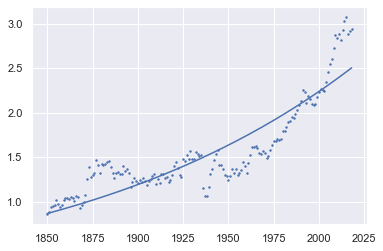

In [120]:
plt.scatter(year, gdp/energy/10**8, s= 2)
G_i, E_i, A, a1, a2, a3 = reg.sReg(year,gdp/energy/10**8 , bounds = [-2, 2000])
K, dt, tm = reg.logReg(year,gdp/energy/10**8, bounds=[0,2500])
plt.plot(yplot, reg.log_fun(yplot, K, dt, tm))